In [1]:
import cv2
import numpy as np
import subprocess as sp
import time
import sys
import os
from scipy.misc import imread
import imutils
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
temp=[]
for i in range(1,969):
    image_path = os.path.join("D:\\photo\\img{0}.png".format(i))
    image = cv2.imread(image_path)
    b,g,r = cv2.split(image)  
    img2 = cv2.merge([r,g,b])
    image = imutils.resize(img2, width = 200)
    temp.append(image)

In [3]:
x_train=np.array(temp)
x_train.shape

(968, 112, 200, 3)

In [4]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(112,200, 3)) 
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)


decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(128, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2),interpolation='nearest')(decoded)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
encoder = Model(input_img, encoded)

In [6]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 112, 200, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 200, 128)     3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 100, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 100, 64)       73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 25, 32)        0         
__________

In [7]:
import numpy as np

x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 112, 200, 3))  # adapt this if using `channels_first` image data format

In [8]:
try:
    autoencoder.load_weights("CNN decode.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [16]:
autoencoder.fit(x_train, x_train, epochs=100, validation_split=0.1, batch_size=24)

Train on 871 samples, validate on 97 samples
Epoch 1/100
871/871 [==============================] - 10s 12ms/step - loss: 0.4778 - val_loss: 0.4819
Epoch 2/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4756 - val_loss: 0.4788
Epoch 3/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4743 - val_loss: 0.4784
Epoch 4/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4728 - val_loss: 0.4803
Epoch 5/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4708 - val_loss: 0.4790
Epoch 6/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4708 - val_loss: 0.4778
Epoch 7/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4697 - val_loss: 0.4742
Epoch 8/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4682 - val_loss: 0.4847
Epoch 9/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4678 - val_loss: 0.4715
Epoch 10/100
871/871 [==============

871/871 [==============================] - 9s 11ms/step - loss: 0.4537 - val_loss: 0.4588
Epoch 81/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4537 - val_loss: 0.4588
Epoch 82/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4531 - val_loss: 0.4579
Epoch 83/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4534 - val_loss: 0.4579
Epoch 84/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4530 - val_loss: 0.4596
Epoch 85/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4533 - val_loss: 0.4590
Epoch 86/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4530 - val_loss: 0.4582
Epoch 87/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4529 - val_loss: 0.4583
Epoch 88/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4529 - val_loss: 0.4577
Epoch 89/100
871/871 [==============================] - 9s 11ms/step - loss: 0.4530 - 

In [17]:
x_train.shape

(968, 112, 200, 3)

In [18]:
autoencoder.save_weights("CNN decode.h5")
print("Saved model to disk")

Saved model to disk


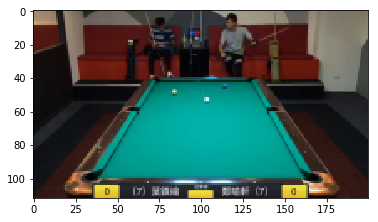

In [19]:
plt.imshow(x_train[0])

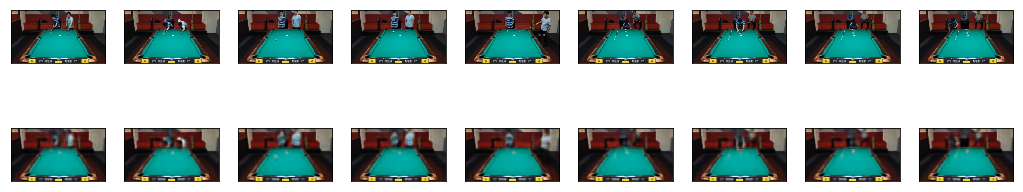

In [20]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_train[:10])
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(112, 200,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
encoder_imgs = encoder.predict(x_train)

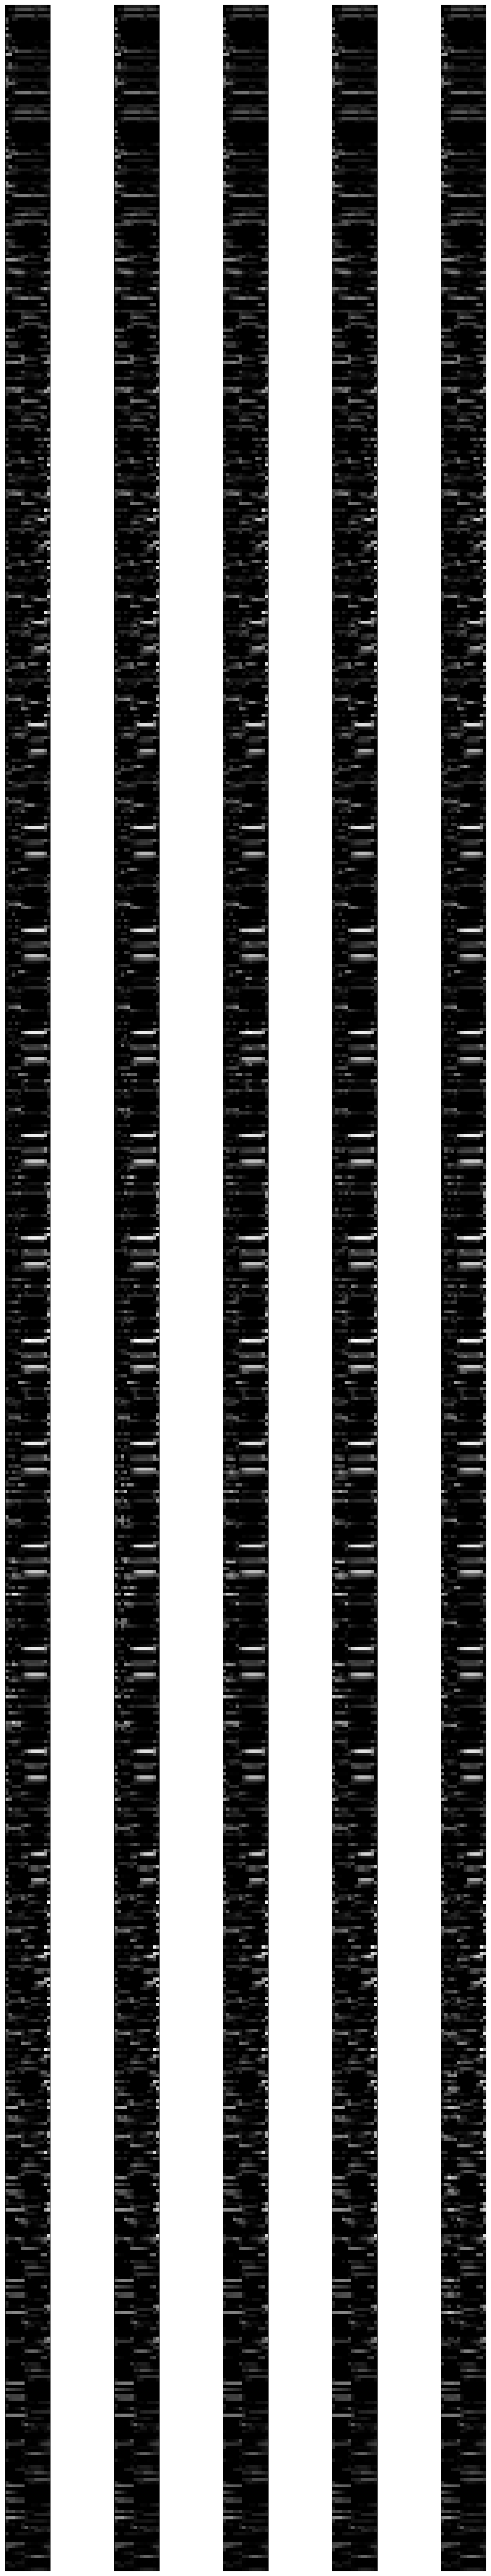

In [22]:
n = 5
plt.figure(figsize=(20, 100))
for i in range(1,6):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoder_imgs[i].reshape(14, 25 * 32).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
encoder_imgs=encoder_imgs .reshape(968,11200)

In [24]:
import argparse
from sklearn.cluster import KMeans
clt = KMeans(random_state=2,n_clusters=5)
labels = clt.fit_predict(encoder_imgs)

In [25]:
labels

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 4, 0, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 4, 2, 0, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,